<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Equation-1:" data-toc-modified-id="Equation-1:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Equation 1:</a></span></li><li><span><a href="#Equation-2." data-toc-modified-id="Equation-2.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Equation 2.</a></span></li><li><span><a href="#Equation-3." data-toc-modified-id="Equation-3.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Equation 3.</a></span></li><li><span><a href="#Equation-4.-Calculate-Probability-of-an-event" data-toc-modified-id="Equation-4.-Calculate-Probability-of-an-event-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Equation 4. Calculate Probability of an event</a></span></li><li><span><a href="#Equation-5.-Log-Odds-of-an-event" data-toc-modified-id="Equation-5.-Log-Odds-of-an-event-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Equation 5. Log-Odds of an event</a></span></li><li><span><a href="#Equation-4." data-toc-modified-id="Equation-4.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Equation 4.</a></span></li><li><span><a href="#Equation-5." data-toc-modified-id="Equation-5.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Equation 5.</a></span></li></ul></div>

# Using Logistic Regression for Binary Classification: An Easy-To-Understand Guide

by Matthew Curcio

For individuals who have studied cell biology or biochemistry, logistic regression may be familiar as [dose-response curves](https://en.wikipedia.org/wiki/Dose%E2%80%93response_relationship) in clinical testing, the sigmoidal curve of [Oxgen binding to Haemoglobin](https://en.wikipedia.org/wiki/Hill_equation_(biochemistry)), [median lethal dose curve](https://en.wikipedia.org/wiki/Median_lethal_dose) for drug safety or even an [exponential growth given limited resources](https://en.wikipedia.org/wiki/Logistic_function).

When Data Scientists discuss logistic regression (Logit) it is often used as a binary classifier. But, It can help you understand an outcome or make a prediction by providing three useful pieces of information.

1. Presence or Absence of a substance or quality
2. Probability of an event
3. Odds for or against an event

In plain English, a classifier is used to define or predict **Yes:No** answers, for example: 
- Success:Failure  
- Fraud:Safe  
- Benign:Malignant, *or even*
- Buy:Sell

Logit can provide quantifiable results, for example:

- What is the probability customers will leave my business?   
- Is this transaction Fraudulent or Safe?   
- What is the probability that an event may occur?   
- What are the odds of being diagnosed with cancer if you smoke versus if you do not? 

<!--
It can even help Data Scientists determine which factors are important for keeping your customers and the probability of an event occurring.
-->

First, let’s take an example, a graph of the projected world population between 1950 and 2100:

![World Population between 1950-2100](assets/world-pop-1950-2100.cc.jpg)

When we look at the projected world population, we see each continent is added like a stacked bar chart, now over time. Further back in time, we approach the *asymptote*, zero population of humans. In the future, we will find a maximum value, an *asymptote*, that could be reached.

Let’s see if we can simplify this complicated s-shaped curve. 

If we only consider any **two points** on the total population curve, we could describe it with a linear set of equations.

### Equation 1. 

$$Total ~ Population ~ (t=i → f) = \beta_{Asia} \cdot x_{Asia} ~+~ \beta_{Africa} \cdot x_{Africa} ~+~ ... ~+~ \beta_{Oceania} \cdot x_{Oceania} ~+~ \beta_0$$

This makes sense since each continent has its own:
- growth rate per time ($\beta_{continent}$), and 
- starting population ($x_{continent}$) at $~time=i$ 
- plus the constant ($\beta_0$).

If we wish to calculate more samples, we can transform our equation to matrix format. 

We can rewrite this in matrix format:

### Equation 2.

$$Total ~ Population (t=i → f) =~ 
\left( \begin{array}{c} Growth~Rate \\ \overline{\beta_{Oceania}} \\ \beta_{S.America} \\ \beta_{N.America} \\ \beta_{Europe} \\ \beta_{Africa} \\ \beta_{Asia}  \end{array} \right)^{\large T}
\left( \begin{array}{c} Population \\ \overline{x_{Oceania}} \\ x_{S.America} \\ x_{N.America} \\ x_{Europe} \\ x_{Africa} \\ x_{Asia}  \end{array} \right)
+  \beta_0$$

### Equation 3. 

$$Population(t=i ~ → ~ f) = MX + b$$

>NOTE: By convention capital letters represent matrices.

How you may ask, can we have a linear regression fit a curved s-shaped line? 

- Using logs and exponents, we can transform the regression line in several steps.

### Equation 4. 

$$ln(e^{(-MX + b)}) = MX + b$$

Now let’s step back and look at a logistic curve.

## Plotting A Logistic Curve

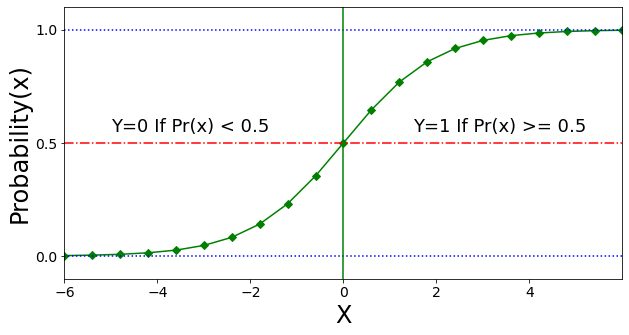

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_logit():
    x = np.linspace(-6,6,21)
    y = 1/(1+np.exp(-1*x))

    plt.figure(figsize=(10,5)) # 10 is width, 5 is height
    plt.plot(x, y,'g',marker='D')  # g=green
    #plt.title('A Simple Logistic Curve',fontsize=24)  
    plt.xlabel('X',fontsize=24)
    plt.ylabel('Probability(x)',fontsize=24)
    plt.xlim(-6,6)
    plt.ylim(-0.1,1.1)

    plt.axhline(y=0.5, color='r', linestyle='-.')
    plt.axhline(y=0, color='b', linestyle='dotted')
    plt.axhline(y=1, color='b', linestyle='dotted')
    plt.axvline(x = 0, color = 'g')
    plt.text(-5, 0.55,'Y=0 If Pr(x) < 0.5',fontsize=18)
    plt.text(1.5, 0.55,'Y=1 If Pr(x) >= 0.5',fontsize=18)
    #plt.text(-1.9, 0.92,'Inflection Pt, x=0',fontsize=18)
    plt.yticks(np.arange(0, 1.3, 0.5),fontsize=14)
    plt.xticks(np.arange(-6,6,2),fontsize=14)
    plt.show()


plot_logit()

1. Our x-axis can be time or any other independent value. 
2. The y-axis, we have Probability of event x occuring, (0 < Pr(x) <= 1). 
a
On our simple graph, we see an inflection point at 50% Probability, where x=0. At that point, aren't we stating that success will occur 1/2 of the time. Using the complement we can also say that failure (1-p) will occur 1/2 of the time. Can we use this fact in our next transformation?

### Equation 5. Calculate Probability of an event

$$ln( Probability ) = e^{-MX + b}$$

### Equation 6. Log-Odds of an event

$$ln \left( \frac{p}{1-p} \right) = e^{-MX + b}$$

In other words, if the Probability = 0.5 then we find the odds of our event occurring at x=0 is [(0.5) : (0.5)]. 

If we were flipping a coin that it would be 1:1 odds. The $ln(\frac{p}{1-p})$ in equation 6 is commonly called log-odds. But if we wanted just odds, we would transform using the exponent.

### Equation 7. 

$$\large e^{ \left( ln(\frac{p}{1-p}) \right) } = e^{-MX + b}$$

$$\large \frac{p}{1-p} = e^{-MX + b}$$

Next, We can expand our matrix multiplication to get Equation 5. 

### Equation 8. 

$$\large \frac{p}{1-p} = e^{~β_{Asia} \cdot xAsia + β_{Africa} \cdot xAfrica +...+ β_{Oceania} \cdot xOceania + β_0}$$

### Equation 9.

With a little rearrangement we get:



https://www.kaggle.com/code/neisha/heart-disease-prediction-using-logistic-regression

## Using Python to calculate a logistic regression

Python has several different libraries that can calculate Logistic regression. 

One package is [Statsmodels](https://www.statsmodels.org/stable/index.html)



In [5]:
# Common Imports/Libaries
import pandas as pd
import numpy as np

path = 'data/raw/'
fileName = 'CHD_preprocessed.csv'
COL_NAMES = ['Male', 'Age', 'Education', 'Smoker', 'CigsDay',
             'BPmeds', 'PrevStroke', 'PrevHyp', 'Diabetes', 'TotChol',
             'SysBP', 'DiaBP', 'BMI', 'Hrate', 'Glucose',
             'ChronHeartDis']
df = pd.read_csv(path+fileName, header=0, names=COL_NAMES)

df.head()

,Male,Age,Education,Smoker,CigsDay,BPmeds,PrevStroke,PrevHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,Hrate,Glucose,ChronHeartDis
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [20]:
import statsmodels.formula.api as smf

# Setup & Fit logistic regression model
formula = "ChronHeartDis ~ Male+Age+Education+Smoker+CigsDay+\
                           BPmeds+PrevStroke+PrevHyp+Diabetes+TotChol+\
                           SysBP+DiaBP+BMI+Hrate+Glucose"

model = smf.logit(formula = formula, data=df).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.378668
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          ChronHeartDis   No. Observations:                 4133
Model:                          Logit   Df Residuals:                     4117
Method:                           MLE   Df Model:                           15
Date:                Tue, 14 Feb 2023   Pseudo R-squ.:                  0.1113
Time:                        15:24:59   Log-Likelihood:                -1565.0
converged:                       True   LL-Null:                       -1761.0
Covariance Type:            nonrobust   LLR p-value:                 3.561e-74
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.0173      0.656    -12.226      0.000      -9.302      -6.732
Male           0.4866      0.

### Understanding Logit Output from the StatsModels package.

Intercept     -8.0173      0.656    -12.226      0.000      -9.302      -6.732
Male
Age
CigsDay 
PrevStroke 
SysBP 
Glucose 

If we use only the features that have acceptable P-values, where P<0.05, we have:
    
Glucose 
$$\frac{p}{1-p} = e^{(0.4866 \cdot Male + 0.0626 \cdot Age + 0.0204 \cdot CigsDay + 0.9558 \cdot PrevStroke + 0.0146 \cdot SysBP - 8.0173)}$$

If we wanted to find the odds of having Cardiac Heart Disease of Women versus Men we need to compare the odds of each.

Odds_(Women) = −12.72

Odds_(Men) = −11.40

$$\frac{Odds_(Women)}{Odds_(Men)} = \frac{−12.72}{−11.40} = 1.116$$

Meaning Men have a 11.6% greater crisk of having a Cardiac Heart Disease compared to Women.

In [ ]:
https://www.kaggle.com/code/neisha/heart-disease-prediction-using-logistic-regression